In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import warnings

# Données des villes

In [3]:
cities = pd.read_csv('cities.csv')
cities 

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN
...,...,...,...,...,...,...
8035,9964,"Saint-André-lez-Lille, Hauts-de-France, France",saint-andre-lez-lille,50.654250,3.047690,NaN
8036,10863,"Kiev, Шевченківський район, Ukraine",kiev,50.450100,30.523400,NaN
8037,11144,"Brighton, England, UK",brighton,50.822000,-0.137400,NaN
8038,11377,"Manises, Comunitat Valenciana, España",manises,39.493000,-0.462100,NaN


In [4]:
# les valeurs manquantes dans les données
cities.isna().sum()

id                0
local_name        0
unique_name       1
latitude          0
longitude         0
population     7671
dtype: int64

on remarque que presque 95% de la variable population est manquant.

In [5]:
print("Nombre de ids uniques:", cities.id.unique().shape[0])
print("Nombre de names uniques:", cities.unique_name.unique().shape[0])
print("Nombre de ligne dans les données:", cities.shape[0])

Nombre de ids uniques: 8040
Nombre de names uniques: 8040
Nombre de ligne dans les données: 8040


Tous les villes dans les données sont uniques (pas de valeurs dupliquées)

In [6]:
# Description des deux variables latitude et longitude
cities.loc[:,['latitude', 'longitude']].describe()

,latitude,longitude
count,8040.000000,8040.000000
mean,47.223456,6.299331
std,3.700934,7.747070
min,1.370676,-101.397388
25%,44.662402,1.214282
50%,47.304750,4.887856
75%,49.611998,10.311597
max,64.145981,48.731938


# Données des stations

In [7]:
stations = pd.read_csv('stations.csv')
stations 

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737
...,...,...,...,...
11030,11032,Porto Avda De Los Aliados,41.146922,-8.611122
11031,11033,Rom Ciampino Flughafen Piazzale Leonardo da Vinci,41.804102,12.597110
11032,11034,Sants,41.379892,2.139462
11033,11035,Vozilici D66,45.157136,14.164140


In [8]:
# les valeurs manquantes dans les données
stations.isna().sum()

id             0
unique_name    0
latitude       0
longitude      0
dtype: int64

In [10]:
stations.unique_name.unique().shape[0]

11035

Pas de valeurs dupliquées

In [11]:
# Description des deux variables latitude et longitude
stations.loc[:,['latitude', 'longitude']].describe()

,latitude,longitude
count,11035.000000,11035.000000
mean,47.526678,7.580807
std,3.953972,63.655681
min,-22.355790,-22.625538
25%,44.896447,1.358655
50%,47.759670,5.824010
75%,50.349956,12.166133
max,64.137571,6645.000000


# Données des providers 

In [14]:
providers = pd.read_csv('providers.csv')
providers

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus
...,...,...,...,...,...,...,...,...,...,...
222,8384,10,16,thalys,Thalys,True,True,False,True,train
223,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
224,8387,30,NaN,vatry,Vatry,NaN,NaN,NaN,NaN,bus
225,8388,40,NaN,beauval,Beauval,NaN,NaN,NaN,NaN,bus


In [15]:
# les valeurs manquantes dans les données
providers.isna().sum()

id                       0
company_id               0
provider_id             14
name                     0
fullname                 0
has_wifi                 3
has_plug                 3
has_adjustable_seats     3
has_bicycle              3
transport_type           0
dtype: int64

In [20]:
print("Nombre de ids unique:", providers.id.unique().shape[0])
print("Nombre de name unique", providers.name.unique().shape[0])

Nombre de ids unique: 227
Nombre de name unique 227


In [21]:
# Description des variables
providers.loc[:,[ 'has_wifi', 'has_plug', 'has_adjustable_seats', 'has_bicycle', 'transport_type']].describe()

,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
count,224,224,224,224,227
unique,2,2,2,2,4
top,False,False,False,False,bus
freq,220,221,212,223,214


### Distribution des valeurs dans les variables

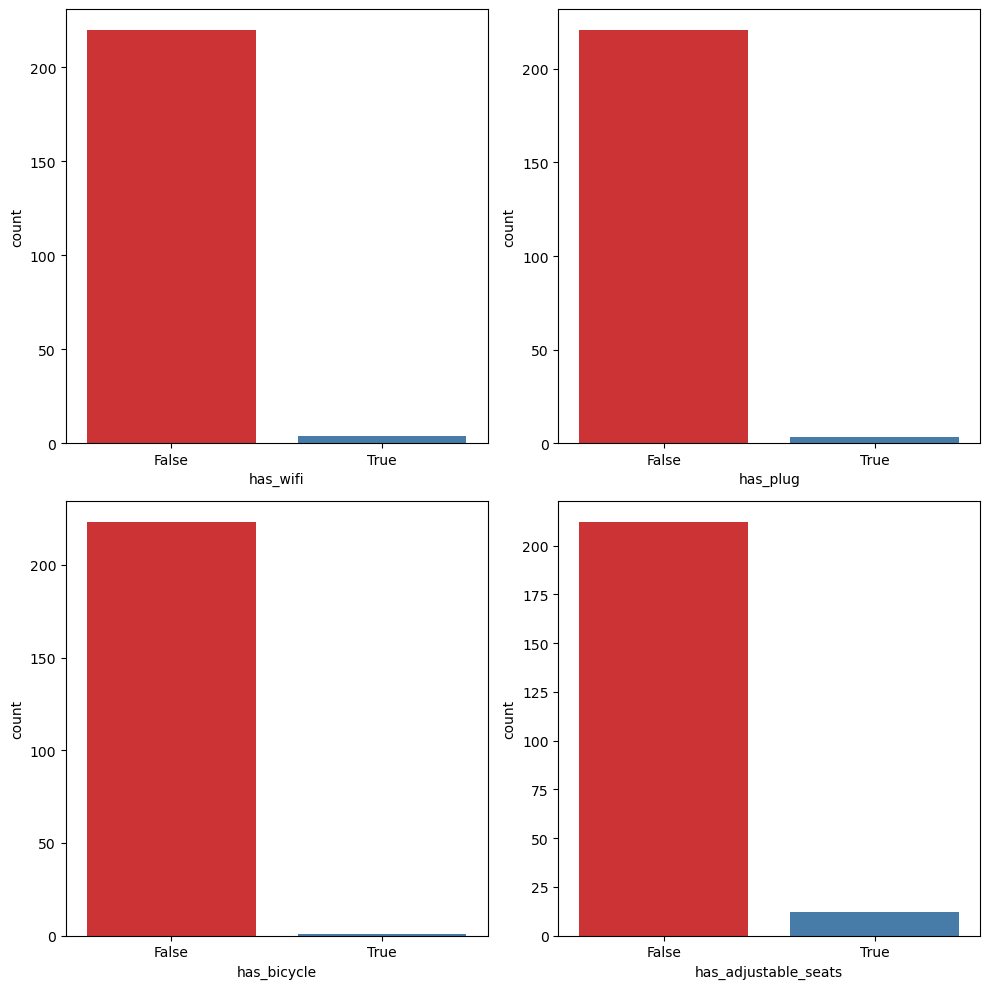

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# has_wifi
sns.countplot(x='has_wifi', data=providers, palette='Set1', ax=axs[0, 0])

# has_plug
sns.countplot(x='has_plug', data=providers, palette='Set1', ax=axs[0, 1])

# has_bicycle
sns.countplot(x='has_bicycle', data=providers, palette='Set1', ax=axs[1, 0])

# has_adjustable_seats
sns.countplot(x='has_adjustable_seats', data=providers, palette='Set1', ax=axs[1, 1])

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='transport_type', ylabel='count'>

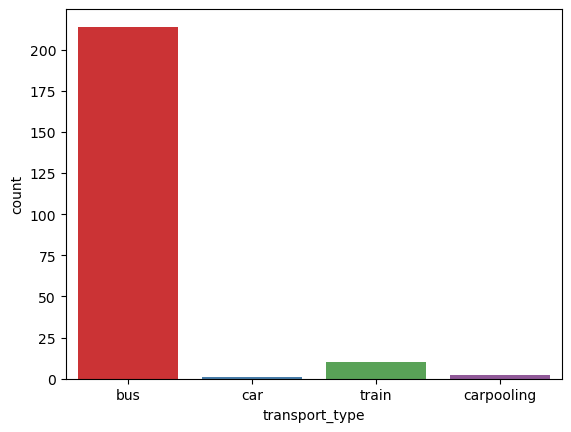

In [17]:
sns.countplot(x='transport_type', data=providers, palette='Set1')

# Données des tickets

In [110]:
tickets = pd.read_csv('ticket_data.csv')

In [111]:
# changement des types des variables
tickets.o_station = tickets.o_station.astype("category")
tickets.d_station = tickets.d_station.astype("category")
 
tickets['departure_ts'] = pd.to_datetime(tickets['departure_ts'])
tickets['arrival_ts'] = pd.to_datetime(tickets['arrival_ts'])
tickets['search_ts'] = pd.to_datetime(tickets['search_ts'])

tickets.dtypes

id                               int64
company                          int64
o_station                     category
d_station                     category
departure_ts       datetime64[ns, UTC]
arrival_ts         datetime64[ns, UTC]
price_in_cents                   int64
search_ts          datetime64[ns, UTC]
middle_stations                 object
other_companies                 object
o_city                           int64
d_city                           int64
dtype: object

In [112]:
# Calculer une variable qui représentera la durée du trajet
tickets['duration'] = (tickets['arrival_ts'] - tickets['departure_ts'])/ pd.Timedelta(1, unit='h')

# Calculer une variable qui représentera la durée entre le départ et la recherche du ticket
tickets['duration_search'] = (tickets['departure_ts'] - tickets['search_ts'])/ pd.Timedelta(1, unit='h')


tickets.head(5)

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duration,duration_search
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,611,542,6.166667,301.774631
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},611,542,17.833333,300.856730
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542,31.950000,301.222163
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542,21.583333,301.222163
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,"{5983,5983}",{8380},611,542,21.766667,309.538830


In [113]:
tickets.isna().sum()

id                     0
company                0
o_station          41441
d_station          41441
departure_ts           0
arrival_ts             0
price_in_cents         0
search_ts              0
middle_stations    41441
other_companies    41441
o_city                 0
d_city                 0
duration               0
duration_search        0
dtype: int64

Cette partie de l'étude est une analyse exploratoire des données et des variables. Donc si on se centente de 50% des données (en supprimant les valeurs manquantes), cet echatillon doit être représenatif de tout l'ensemble.

In [114]:
tickets.dropna(inplace=True)
tickets = tickets.reset_index(drop=True)

In [115]:
#les Les deux variables 'middle_stations' et 'other_companies' sont des listes de valeurs
#sauf qu'il sont de type object (string) 

import ast
# changement des deux variables en colonnes de listes
tickets["middle_stations"] = tickets["middle_stations"].apply(lambda x: ast.literal_eval(x.strip()))
tickets["other_companies"] = tickets["other_companies"].apply(lambda val: ast.literal_eval(val.strip()))

# Extraire nombre de middle stations et other companies
tickets['n_other_companies'] = [len(l) for l in tickets['other_companies']] 
tickets['n_middle_stations'] = [len(l) for l in tickets['middle_stations']] 
# calcul d'une variable trajet (liste contenant les deus ville de départ et d'arrivée)
tickets['trajet'] = [[tickets['o_city'][i],tickets['d_city'][i]] for i in range(0,tickets.shape[0])] 

tickets.head(5)

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duration,duration_search,n_other_companies,n_middle_stations,trajet
0,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{418, 149}",{13},611,542,17.833333,300.856730,1,2,"[611, 542]"
1,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{6246, 6794, 798}","{8376, 8377}",611,542,31.950000,301.222163,2,3,"[611, 542]"
2,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{6246, 6794, 798}","{8376, 8377}",611,542,21.583333,301.222163,2,3,"[611, 542]"
3,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,{5983},{8380},611,542,21.766667,309.538830,1,1,"[611, 542]"
4,6795074,13,767.0,396.0,2017-10-06 05:25:00+00:00,2017-10-06 16:40:00+00:00,1990,2017-10-01 01:04:12.450000+00:00,{932},{13},628,453,11.250000,124.346542,1,1,"[628, 453]"


# Combinner les tables

on peut calculer à partir des longitudes et latitudes les distances entre deux villes ou deux stations

In [116]:
import haversine
def calculate_distance_city(id1, id2):
    city1 = (cities.latitude[cities['id'] == id1].values[0], cities.longitude[cities['id'] == id1].values[0])
    city2 = (cities.latitude[cities['id'] == id2].values[0], cities.longitude[cities['id'] == id2].values[0])
    return haversine.haversine(city1, city2)


def calculate_distance_station(id1, id2):
    station1 = (stations.latitude[stations['id'] == id1].values[0], stations.longitude[stations['id'] == id1].values[0])
    station2 = (stations.latitude[stations['id'] == id2].values[0], stations.longitude[stations['id'] == id2].values[0])
    return haversine.haversine(station1, station2)


o_city = tickets['o_city']
d_city = tickets['d_city']
tickets['distance_cities'] = [calculate_distance_city(o_city[i],d_city[i]) for i in range(0,tickets.shape[0]) ]

o_station = tickets['o_station']
d_station = tickets['d_station']
tickets['distance_stations'] = [calculate_distance_station(o_station[i],d_station[i]) for i in range(0,tickets.shape[0]) ]
tickets.head(5)

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duration,duration_search,n_other_companies,n_middle_stations,trajet,distance_cities,distance_stations
0,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{418, 149}",{13},611,542,17.833333,300.856730,1,2,"[611, 542]",503.197862,504.166029
1,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{6246, 6794, 798}","{8376, 8377}",611,542,31.950000,301.222163,2,3,"[611, 542]",503.197862,504.319149
2,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{6246, 6794, 798}","{8376, 8377}",611,542,21.583333,301.222163,2,3,"[611, 542]",503.197862,504.319149
3,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,{5983},{8380},611,542,21.766667,309.538830,1,1,"[611, 542]",503.197862,504.319149
4,6795074,13,767.0,396.0,2017-10-06 05:25:00+00:00,2017-10-06 16:40:00+00:00,1990,2017-10-01 01:04:12.450000+00:00,{932},{13},628,453,11.250000,124.346542,1,1,"[628, 453]",205.842875,220.385253


# Analyse des variables 

In [117]:
tickets

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duration,duration_search,n_other_companies,n_middle_stations,trajet,distance_cities,distance_stations
0,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{418, 149}",{13},611,542,17.833333,300.856730,1,2,"[611, 542]",503.197862,504.166029
1,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{6246, 6794, 798}","{8376, 8377}",611,542,31.950000,301.222163,2,3,"[611, 542]",503.197862,504.319149
2,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{6246, 6794, 798}","{8376, 8377}",611,542,21.583333,301.222163,2,3,"[611, 542]",503.197862,504.319149
3,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,{5983},{8380},611,542,21.766667,309.538830,1,1,"[611, 542]",503.197862,504.319149
4,6795074,13,767.0,396.0,2017-10-06 05:25:00+00:00,2017-10-06 16:40:00+00:00,1990,2017-10-01 01:04:12.450000+00:00,{932},{13},628,453,11.250000,124.346542,1,1,"[628, 453]",205.842875,220.385253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32722,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00:00,2017-10-27 16:00:00+00:00,2590,2017-10-19 10:35:42.943000+00:00,{408},{8371},628,562,13.500000,183.904738,1,1,"[628, 562]",338.320602,343.823125
32723,6869185,9,279.0,304.0,2017-10-27 07:00:00+00:00,2017-10-27 13:30:00+00:00,2700,2017-10-19 10:35:42.943000+00:00,{1105},{9},628,562,6.500000,188.404738,1,1,"[628, 562]",338.320602,339.710135
32724,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00:00,2017-10-27 15:15:00+00:00,3000,2017-10-19 10:35:42.943000+00:00,{1105},{9},628,562,6.750000,189.904738,1,1,"[628, 562]",338.320602,343.259840
32725,6869189,13,279.0,304.0,2017-10-27 13:25:00+00:00,2017-10-27 21:10:00+00:00,2880,2017-10-19 10:35:42.943000+00:00,{863},{13},628,562,7.750000,194.821405,1,1,"[628, 562]",338.320602,339.710135


### Disttribution des compagnies

In [181]:
tickets.company.value_counts()

8376    8654
13      7433
8380    6763
9       3560
8377    2193
8371    1607
8384     796
8372     725
8382     509
71       252
8379     170
8387      16
216       16
8381      14
10         9
12         5
173        3
192        1
33         1
Name: company, dtype: int64

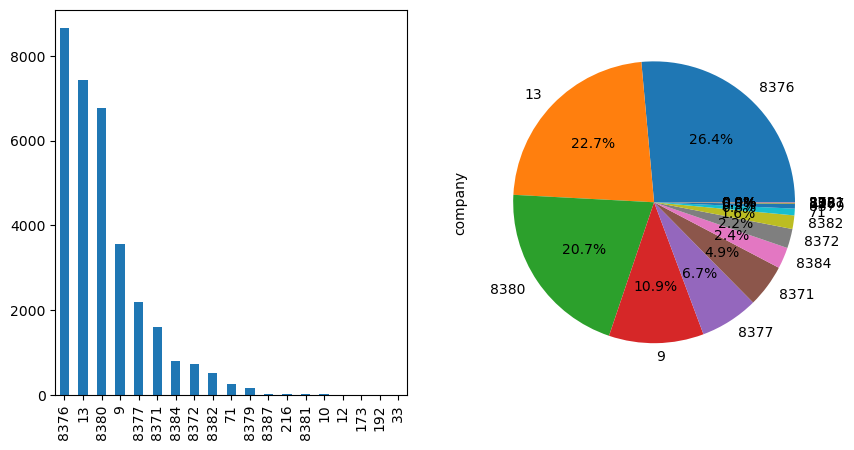

In [187]:
# get the count of unique values in companies
companies = tickets.company.value_counts()
companies_prc = companies/tickets.shape[0] *100
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


companies.plot(kind='bar', ax=ax1)

companies_prc.plot(kind='pie', ax=ax2, autopct='%1.1f%%')


plt.show()

### Moyenne des prix par compagnie

In [118]:
# Stats des prix par trajet
company_price = tickets.groupby('company')['price_in_cents'].agg([min, max, np.mean]).reset_index()
company_price.reset_index()
company_price.columns = ['company', 'min', 'max', 'mean']

In [119]:
company_price

,company,min,max,mean
0,9,850,14596,3333.039045
1,10,2400,5200,3265.555556
2,12,1990,4777,3868.800000
3,13,850,22900,3759.361631
4,33,16395,16395,16395.000000
5,71,1288,15364,3218.976190
6,173,3829,7140,5033.000000
7,192,2450,2450,2450.000000
8,216,5000,10300,6975.000000
9,8371,850,13596,3075.794648


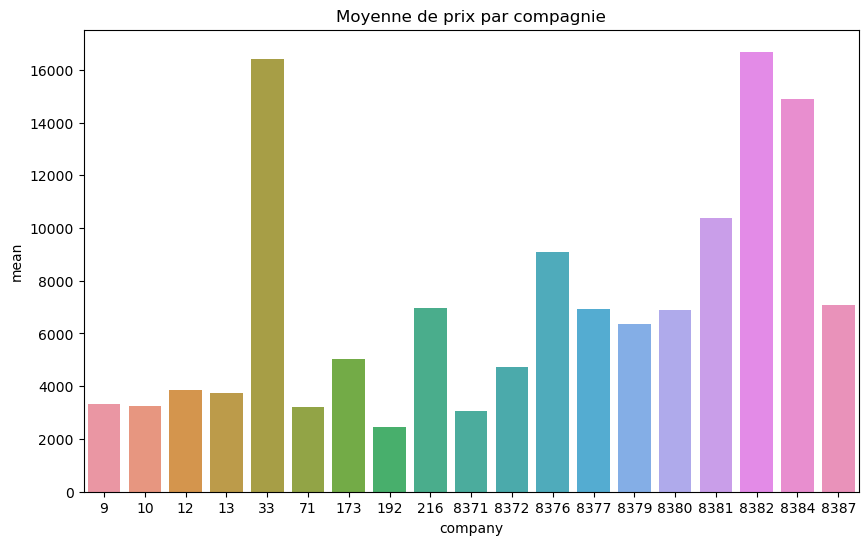

In [120]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='company', y='mean', data=company_price)
plt.title("Moyenne de prix par compagnie")
plt.show()

### Moyenne des prix par trajet

In [121]:
print("Unique values in 'trajet':", tickets['trajet'].apply(lambda x: tuple(x)).nunique())


Unique values in 'trajet': 1221


In [171]:
# Stats des prix par trajet
tickets['trajet'] = tickets['trajet'].apply(tuple)
trajet_price = tickets.groupby('trajet').agg({'price_in_cents': ['min', 'max', 'mean']}).reset_index()
trajet_price

trajet price_in_cents                     
                               min    max          mean
0           (5, 23)          18600  22000  20320.000000
1          (6, 227)           9860  13650  11755.000000
2          (6, 504)           2000   8920   4041.538462
3          (6, 628)           2600   3190   2797.500000
4          (6, 845)           2420   2420   2420.000000
...             ...            ...    ...           ...
1216   (11835, 173)           6600  13300   9022.222222
1217   (11938, 126)           3180   5290   3812.500000
1218  (12124, 1064)           6000   6000   6000.000000
1219   (12166, 857)           5300   5300   5300.000000
1220  (12190, 8937)           9800   9800   9800.000000

[1221 rows x 4 columns]

### Moyenne de durée par trajet

In [172]:
# Stats des durée par trajet
trajet_duration = tickets.groupby('trajet').agg({'duration': ['min', 'max', 'mean']}).reset_index()
trajet_duration

trajet   duration                      
                           min        max       mean
0           (5, 23)   8.883333  15.900000  10.313333
1          (6, 227)  12.400000  15.016667  13.708333
2          (6, 504)   5.600000  12.333333   8.552564
3          (6, 628)   9.666667  14.500000  12.166667
4          (6, 845)   4.183333   4.183333   4.183333
...             ...        ...        ...        ...
1216   (11835, 173)   6.516667   8.183333   7.087037
1217   (11938, 126)  16.750000  35.333333  27.291667
1218  (12124, 1064)  23.166667  23.166667  23.166667
1219   (12166, 857)  21.916667  21.916667  21.916667
1220  (12190, 8937)   9.166667   9.166667   9.166667

[1221 rows x 4 columns]

### Moyenne des prix par durée

La variable duration contient des outliers (Voir partie prediction) donc pour l'etudier on va les suprimer

In [134]:
copy = tickets.copy()
clean_duration = copy[copy.duration.between(copy.duration.quantile(.15), copy.duration.quantile(.85))]
clean_duration.shape

(22958, 19)

In [135]:
clean_duration.duration.describe()

count    22958.000000
mean         8.792306
std          3.985353
min          3.583333
25%          5.433333
50%          7.850000
75%         11.750000
max         18.416667
Name: duration, dtype: float64

In [136]:
bins = [3, 6, 9, 12, 15, float('inf')]
labels = [ '3-6', '6-9', '9-12', '12-15', '15+']


warnings.filterwarnings("ignore")

# create a new column with the chunk labels
clean_duration['duration_cat'] = pd.cut(clean_duration['duration'], bins=bins, labels=labels)


warnings.filterwarnings("default")

In [137]:
# Stats des prix selon la durée
duration_price = clean_duration.groupby('duration_cat')['price_in_cents'].agg([min, max, np.mean]).reset_index()
duration_price.reset_index()
duration_price.columns = ['duration', 'min', 'max', 'mean']
duration_price

,duration,min,max,mean
0,3-6,950,34700,8793.178701
1,6-9,850,38550,7124.386881
2,9-12,730,32000,4962.059107
3,12-15,850,28800,5283.627710
4,15+,850,35100,5300.779432


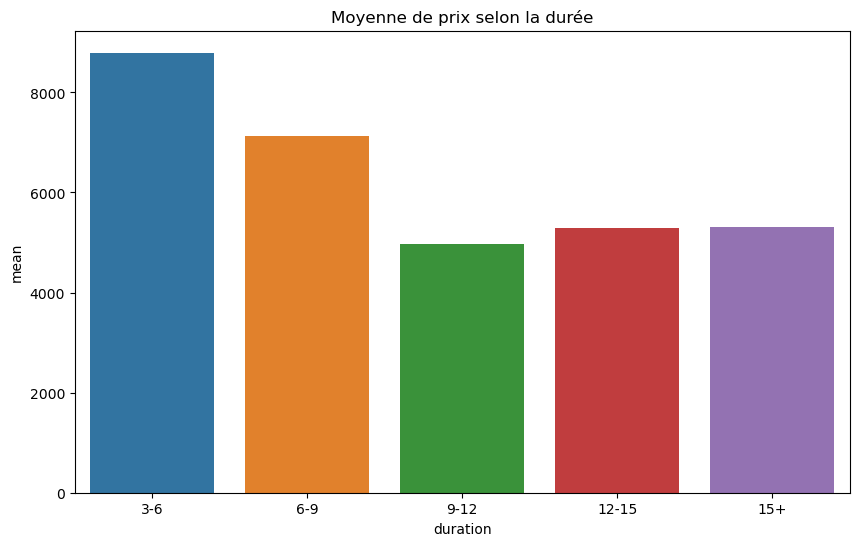

In [155]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='duration', y='mean', data=duration_price)
plt.title("Moyenne de prix selon la durée")
plt.show()

Les trajets de 3 à 6 heures sont les plus chers

### Moyenne des prix par distance

Cette variable aussi contient des outliers qu'on va supprimer

In [139]:
clean_distance = copy[copy.distance_cities.between(copy.distance_cities.quantile(.15), copy.distance_cities.quantile(.85))]
clean_distance.shape

(24694, 19)

In [140]:
copy.distance_cities.describe()

count    32727.000000
mean       434.409144
std        212.416963
min         19.284122
25%        286.988088
50%        400.049165
75%        557.455855
max       1870.174604
Name: distance_cities, dtype: float64

In [141]:
clean_distance.distance_cities.describe()

count    24694.000000
mean       419.947363
std        128.474593
min        205.842875
25%        334.191125
50%        400.049165
75%        506.828289
max        659.558616
Name: distance_cities, dtype: float64

In [157]:
bins_ = [0, 200, 800, 1600, float('inf')]
labels_ = [ '0-200', '200-800', '800-1600', '1600+']


warnings.filterwarnings("ignore")

# create a new column with the chunk labels
copy['distance_cat'] = pd.cut(copy['distance_cities'], bins=bins_, labels=labels_)


warnings.filterwarnings("default")

In [159]:
# Stats des prix selon la distance
distance_price = copy.groupby('distance_cat')['price_in_cents'].agg([min, max, np.mean]).reset_index()
distance_price.reset_index()
distance_price.columns = ['distance', 'min', 'max', 'mean']
distance_price

,distance,min,max,mean
0,0-200,490,25100,3047.559359
1,200-800,1000,38550,6790.015821
2,800-1600,1940,37550,8859.624277
3,1600+,7200,16395,9624.125000


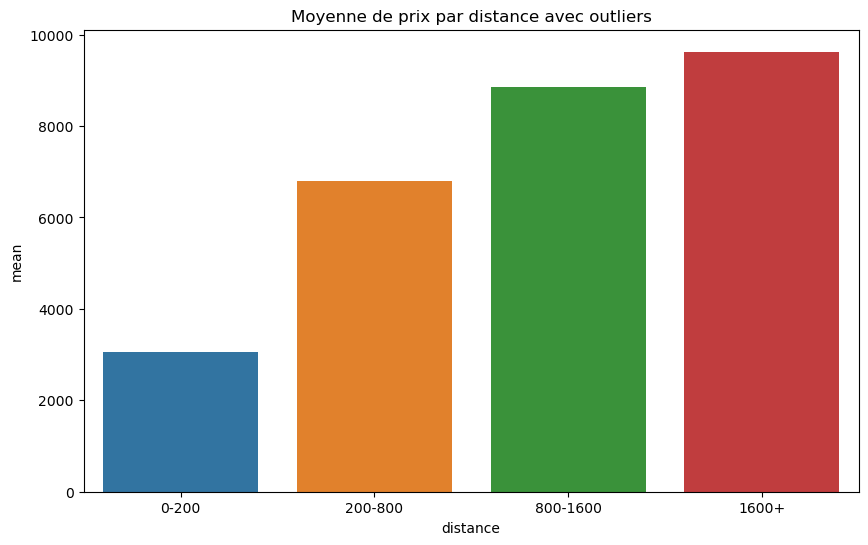

In [160]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='distance', y='mean', data=distance_price)
plt.title("Moyenne de prix par distance avec outliers")
plt.show()

Le prix augmente avec la distance

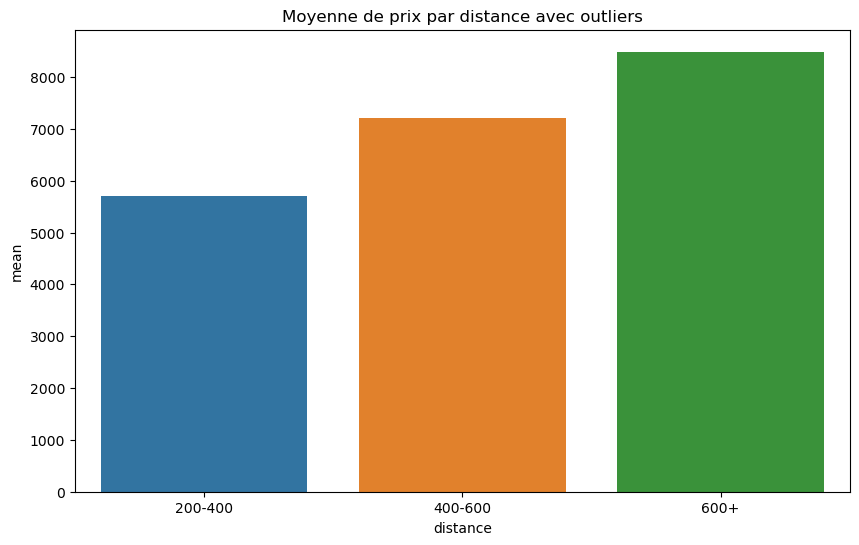

In [162]:
bins_2 = [200, 400, 600, float('inf')]
labels_2 = [ '200-400', '400-600', '600+']


warnings.filterwarnings("ignore")
# create a new column with the chunk labels
clean_distance['distance_cat'] = pd.cut(clean_distance['distance_cities'], bins=bins_2, labels=labels_2)
warnings.filterwarnings("default")

# Stats des prix selon la distance
distance_price_ = clean_distance.groupby('distance_cat')['price_in_cents'].agg([min, max, np.mean]).reset_index()
distance_price_.reset_index()
distance_price_.columns = ['distance', 'min', 'max', 'mean']

#Plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='distance', y='mean', data=distance_price_)
plt.title("Moyenne de prix par distance sans outliers")
plt.show()


### Moyenne de durée par compagnie

In [165]:
# Stats des durées par compagnie
duration_company = clean_duration.groupby('company')['duration'].agg([min, max, np.mean]).reset_index()
duration_company.reset_index()
duration_company.columns = ['company', 'min', 'max', 'mean']
duration_company

,company,min,max,mean
0,9,3.583333,18.416667,10.598097
1,10,5.750000,12.083333,8.305556
2,12,9.416667,14.250000,11.333333
3,13,3.583333,18.416667,11.301429
4,71,3.583333,18.333333,11.616078
5,173,15.833333,15.833333,15.833333
6,192,15.933333,15.933333,15.933333
7,216,3.750000,11.583333,5.613636
8,8371,3.750000,18.416667,11.471463
9,8372,4.416667,18.416667,11.585690


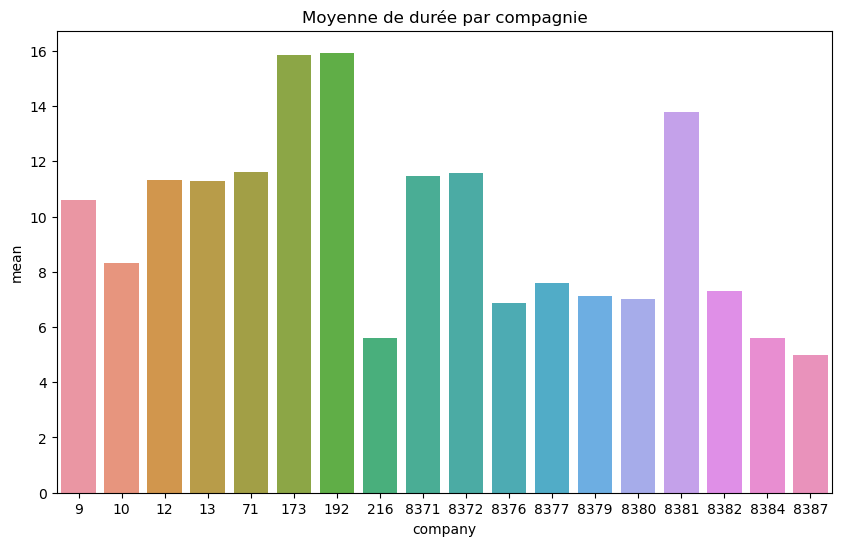

In [166]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='company', y='mean', data=duration_company)
plt.title("Moyenne de durée par compagnie")
plt.show()

### Moyenne de distance par compagnie

In [169]:
# Stats des prix selon la durée
distance_company = copy.groupby('company')['distance_cities'].agg([min, max, np.mean]).reset_index()
distance_company.reset_index()
distance_company.columns = ['company', 'min', 'max', 'mean']
distance_company

,company,min,max,mean
0,9,30.513023,1756.059279,452.170281
1,10,301.623074,631.120911,412.249767
2,12,123.164902,528.532936,376.723611
3,13,27.378412,1754.305396,482.514414
4,33,1870.174604,1870.174604,1870.174604
5,71,76.210614,1253.259158,329.010340
6,173,410.361869,1036.811721,727.403662
7,192,321.897192,321.897192,321.897192
8,216,35.631908,333.672875,143.113878
9,8371,61.120481,1756.059279,468.882583


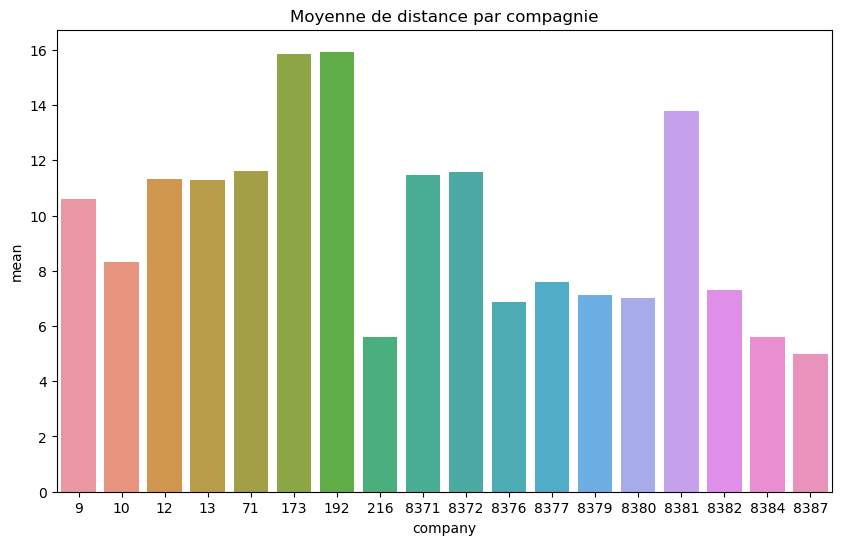

In [170]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='company', y='mean', data=duration_company)
plt.title("Moyenne de distance par compagnie")
plt.show()